In [39]:
import numpy as np
import  cv2 as cv
from matplotlib import pyplot as plt

In [40]:
img = cv.imread('/content/christian_bale.jpg',0)

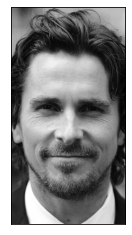

In [41]:
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [42]:
img.shape

(1200, 630)

In [43]:
s_k = np.zeros_like(img)
n_k = np.zeros_like(img)
nw_k = np.zeros_like(img)
ne_k = np.zeros_like(img)
sw_k = np.zeros_like(img)
se_k = np.zeros_like(img)
w_k = np.zeros_like(img)
e_k = np.zeros_like(img)

In [44]:
na= np.array([[-3,-3,5],[-3,0,5],[-3,-3,5]])
wa= np.array([[5,5,5],[-3,0,-3],[-3,-3,-3]])
sa= np.array([[5,-3,-3],[5,0,-3],[5,-3,-3]])
nea= np.array([[-3,-3,-3],[-3,0,5],[-3,5,5]])
nwa= np.array([[-3,5,5],[-3,0,5],[-3,-3,-3]])
sea= np.array([[-3,-3,-3],[5,0,-3],[5,5,-3]])
swa= np.array([[5,5,-3],[5,0,-3],[-3,-3,-3]])
ka= np.array([[-3,-3,-3],[-3,0,-3],[5,5,5]])

In [45]:
import scipy
from scipy import ndimage

In [46]:
e_k=ndimage.convolve(img,ka,mode='nearest',cval=0.0)
n_k=ndimage.convolve(img,na,mode='nearest',cval=0.0)
s_k=ndimage.convolve(img,sa,mode='nearest',cval=0.0)
w_k=ndimage.convolve(img,wa,mode='nearest',cval=0.0)
ne_k=ndimage.convolve(img,nea,mode='nearest',cval=0.0)
nw_k=ndimage.convolve(img,nwa,mode='nearest',cval=0.0)
se_k=ndimage.convolve(img,sea,mode='nearest',cval=0.0)
sw_k=ndimage.convolve(img,swa,mode='nearest',cval=0.0)

In [47]:
ldp_mat=np.zeros_like(img)

In [48]:
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    lst=[se_k[i][j],s_k[i][j],sw_k[i][j],w_k[i][j],nw_k[i][j],n_k[i][j],ne_k[i][j],e_k[i][j]]
    l=[abs(h) for h in lst]
    marr=np.argsort(l)
    marr1=marr[::-1]
    binary=np.zeros(8,dtype="uint8")
    binary[marr1[0]]=1
    binary[marr1[1]]=1
    binary[marr1[2]]=1
    d_no=binary[0]*2**7+binary[1]*2**6+binary[2]*2**5+binary[3]*2**4+binary[4]*2**3+binary[5]*2**2+binary[6]*2**1+binary[7]*2**0
    ldp_mat[i][j]=d_no

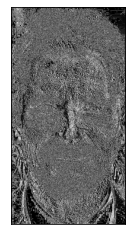

In [49]:
plt.imshow(ldp_mat,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()